# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


EDA allows analysts to understand the data while cheking for any errors. EDA also lets analysts to transform data as needed for analysis such converting variables into categorical variables.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
data = data.dropna()

In [10]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
data.duplicated().sum()

0

Check for and handle outliers.

Text(0.5, 1.0, 'Video Duration')

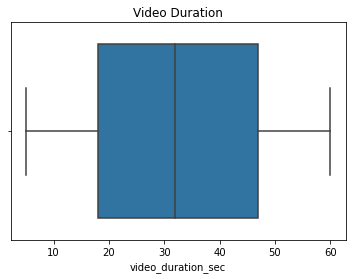

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
ax = sns.boxplot(data=data, x='video_duration_sec')
ax.set_title('Video Duration')

Text(0.5, 1.0, 'Video View Count')

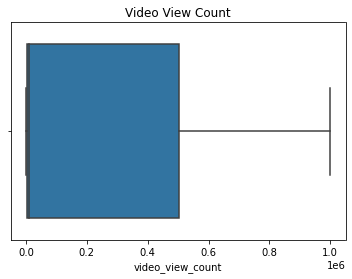

In [13]:
# Create a boxplot to visualize distribution of `video_view_count`
ax = sns.boxplot(data=data, x='video_view_count')
ax.set_title('Video View Count')

Text(0.5, 1.0, 'Video Like Count')

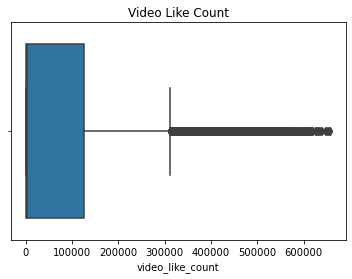

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
ax = sns.boxplot(data=data, x='video_like_count')
ax.set_title('Video Like Count')

Text(0.5, 1.0, 'Video Comment Count')

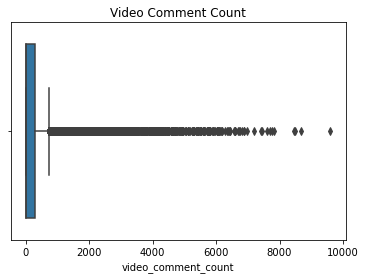

In [15]:
# Create a boxplot to visualize distribution of `video_comment_count`
ax = sns.boxplot(data=data, x='video_comment_count')
ax.set_title('Video Comment Count')

In [16]:
# Check for and handle outliers for video_like_count
lower = data['video_like_count'].quantile(0.25)
upper = data['video_like_count'].quantile(0.75)
iqr = upper - lower

outlier_upper = upper + 1.5*iqr

data.loc[data['video_like_count'] > outlier_upper, 'video_like_count'] = outlier_upper

#data[data['video_like_count'] == outlier_upper ]
#data[data['video_like_count'] > outlier_upper ]

In [17]:
# Check for and handle outliers for video_comment_count
lower2 = data['video_comment_count'].quantile(0.25)
upper2 = data['video_comment_count'].quantile(0.75)
iqr2 = upper2 - lower2

outlier_upper2 = upper2 + 1.5*iqr2

data.loc[data['video_comment_count'] > outlier_upper2, 'video_comment_count'] = outlier_upper2

#data[data['video_comment_count'] == outlier_upper2 ]
#data[data['video_comment_count'] > outlier_upper2 ]

Check class balance.

In [18]:
# Check class balance for verified_status
data['verified_status'].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.2% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [19]:
# Identify data points from majority and minority classes
majority = data[data['verified_status'] == 'not verified']
minority = data[data['verified_status'] == 'verified']

# Upsample the minority class (which is "verified")
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=1)

# Combine majority class with upsampled minority class
new_data = pd.concat([majority,minority_upsampled]).reset_index(drop=True)
#new_data

# Display new class counts
new_data['verified_status'].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [20]:
mask = new_data['verified_status']

claim_text = new_data[mask == 'verified']['video_transcription_text'].str.len().mean()
opinion_text = new_data[mask == 'not verified']['video_transcription_text'].str.len().mean()

print('Average tanscript length for claim vids: ', claim_text)
print('Average tanscript length for opinion vids: ', opinion_text)

Average tanscript length for claim vids:  84.50039141131738
Average tanscript length for opinion vids:  89.40114068441065


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [21]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
new_data['text_length'] = new_data['video_transcription_text'].str.len()

In [22]:
# Display first few rows of dataframe after adding new column
new_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

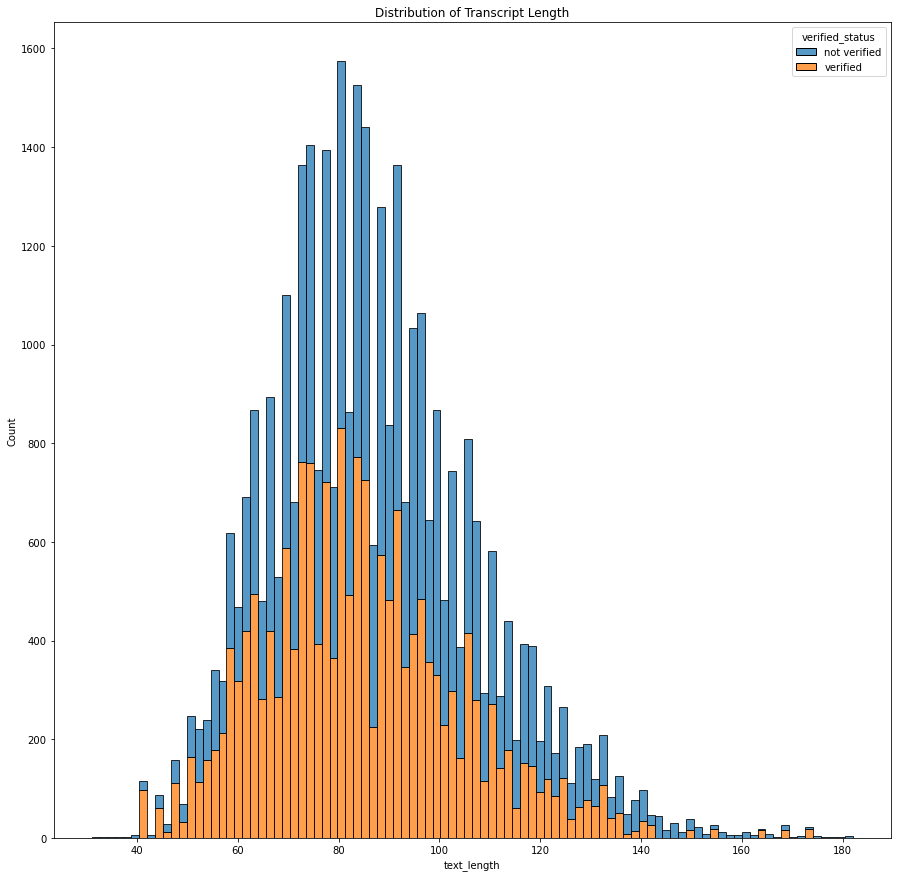

In [23]:
# Create two histograms in one plot
plt.figure(figsize=(15,15))
sns.histplot(data=new_data, x=new_data['text_length'], hue='verified_status', multiple='stack')
plt.title('Distribution of Transcript Length')
plt.show();

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [24]:
new_data.corr()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.006018,-0.012397,-0.698591,-0.629498,-0.509116,-0.488922,-0.610290,-0.196636
video_id,-0.006018,1.000000,0.008404,0.004846,0.008931,0.012986,0.013216,0.016501,-0.000707
video_duration_sec,-0.012397,0.008404,1.000000,0.013334,0.005698,0.003157,0.005644,-0.002042,-0.013308
video_view_count,-0.698591,0.004846,0.013334,1.000000,0.856282,0.710092,0.687221,0.745309,0.245800
video_like_count,-0.629498,0.008931,0.005698,0.856282,1.000000,0.832391,0.803253,0.814288,0.217016
video_share_count,-0.509116,0.012986,0.003157,0.710092,0.832391,1.000000,0.706665,0.671975,0.174367
video_download_count,-0.488922,0.013216,0.005644,0.687221,0.803253,0.706665,1.000000,0.793938,0.174298
video_comment_count,-0.610290,0.016501,-0.002042,0.745309,0.814288,0.671975,0.793938,1.000000,0.217994
text_length,-0.196636,-0.000707,-0.013308,0.245800,0.217016,0.174367,0.174298,0.217994,1.000000


Visualize a correlation heatmap of the data.

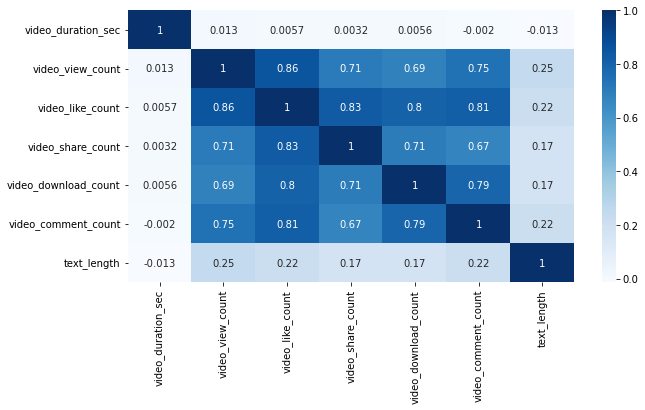

In [25]:
# Create a heatmap to visualize how correlated variables are
heat_data = new_data[['video_duration_sec','video_view_count','video_like_count', 
                      'video_share_count','video_download_count','video_comment_count',
                      'text_length']]
plt.figure(figsize=(10,5))
sns.heatmap(heat_data.corr(), annot=True, cmap="Blues")

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [26]:
y = new_data['verified_status']


Select the features.

In [27]:
X = new_data.drop(['verified_status','#', 'video_id',
                   'video_transcription_text','video_like_count','text_length'], axis=1)

# Display first few rows of features dataframe
X.head()

,claim_status,video_duration_sec,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,claim,59,under review,343296.0,241.0,1.0,0.0
1,claim,32,active,140877.0,19034.0,1161.0,684.0
2,claim,31,active,902185.0,2858.0,833.0,329.0
3,claim,25,active,437506.0,34812.0,1234.0,584.0
4,claim,19,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [29]:
# Get shape of each training and testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25037, 7)
(10731, 7)
(25037,)
(10731,)


### **Task 3c. Encode variables**

Check the data types of the features.

In [30]:
X.dtypes

claim_status             object
video_duration_sec        int64
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [31]:
# Get unique values in `claim_status`
X['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [32]:
# Get unique values in `author_ban_status`
X['author_ban_status'].unique()

array(['under review', 'active', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [33]:
# Select the training features that needs to be encoded
train_encoding_data = X_train[['claim_status','author_ban_status']]

# Display first few rows
train_encoding_data.head()


,claim_status,author_ban_status
32925,opinion,active
4266,claim,active
24979,opinion,active
24074,opinion,active
32056,opinion,active


In [34]:
# Set up an encoder for one-hot encoding the categorical features
encoder = OneHotEncoder(drop='first', sparse=False)

In [92]:
# Fit and transform the training features using the encoder
X_train_encode = encoder.fit_transform(train_encoding_data)

In [114]:
# Get feature names from encoder
#encoder.get_feature_names_out()

#get_feature_names_out() not working. for now, will manually type out all the features

In [53]:
# Display first few rows of encoded training features
X_train_encode

array([[1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [67]:
# Place encoded training features (which is currently an array) into a dataframe
encode_df = pd.DataFrame(X_train_encode, columns=['claim_status_opinion','author_ban_status_banned',
                                                  'author_ban_status_under review'])


# Display first few rows
encode_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [70]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=['claim_status','author_ban_status']).head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
32925,38,9010.0,1340.0,76.0,24.0
4266,25,623816.0,59817.0,4177.0,728.5
24979,56,4882.0,479.0,34.0,4.0
24074,43,3453.0,328.0,9.0,1.0
32056,38,9021.0,90.0,2.0,1.0


In [72]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=['claim_status','author_ban_status']).reset_index(drop=True),encode_df], axis=1)

# Display first few rows
X_train_final.head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,38,9010.0,1340.0,76.0,24.0,1.0,0.0,0.0
1,25,623816.0,59817.0,4177.0,728.5,0.0,0.0,0.0
2,56,4882.0,479.0,34.0,4.0,1.0,0.0,0.0
3,43,3453.0,328.0,9.0,1.0,1.0,0.0,0.0
4,38,9021.0,90.0,2.0,1.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [74]:
# Check data type of outcome variable
### YOUR CODE HERE ###
y_train.dtype

dtype('O')

In [76]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [77]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encode = OneHotEncoder(drop='first', sparse=False)

In [80]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_encode = y_encode.fit_transform(y_train.values.reshape(-1,1)).ravel()

# Display the encoded training outcome variable
y_train_encode


array([1., 0., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [84]:
# Construct a logistic regression model and fit it to the training set

clf = LogisticRegression().fit(X_train_final,y_train_encode)

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [89]:
# Select the testing features that needs to be encoded
test_encoding_data = X_test[['claim_status','author_ban_status']]


# Display first few rows
test_encoding_data.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,opinion,active
5727,claim,active
11607,opinion,active


In [90]:
# Transform the testing features using the encoder
X_test_encode = encoder.fit_transform(test_encoding_data)


# Display first few rows of encoded testing features
X_test_encode

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [94]:
# Place encoded testing features (which is currently an array) into a dataframe
x_encode_df = pd.DataFrame(X_test_encode, columns=['claim_status_opinion','author_ban_status_banned',
                                                  'author_ban_status_under review'])


# Display first few rows
x_encode_df.head()


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [95]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=['claim_status','author_ban_status']).head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,49,8623.0,28.0,31.0,3.0
31748,12,8345.0,874.0,61.0,19.0
20197,23,1111.0,61.0,0.0,0.0
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [98]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=['claim_status','author_ban_status']).reset_index(drop=True),x_encode_df], axis=1)



# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,49,8623.0,28.0,31.0,3.0,1.0,0.0,0.0
1,12,8345.0,874.0,61.0,19.0,1.0,0.0,0.0
2,23,1111.0,61.0,0.0,0.0,1.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [99]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = clf.predict(X_test_final)


Display the predictions on the encoded testing set.

In [100]:
# Display the predictions on the encoded testing set
y_pred


array([1., 1., 1., ..., 1., 1., 1.])

Display the true labels of the testing set.

In [101]:
# Display the true labels of the testing set
y_test


21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14615    not verified
11828    not verified
17480    not verified
22737        verified
22849        verified
Name: verified_status, Length: 10731, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [103]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
y_test_final = y_encode.transform(y_test.values.reshape(-1,1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [104]:
# Get shape of each training and testing set
X_train_final.shape, X_test_final.shape, y_train_encode.shape, y_test_final.shape


((25037, 8), (10731, 8), (25037,), (10731,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

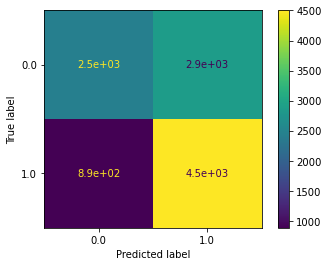

In [108]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_test_final, y_pred, labels=clf.classes_)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [111]:
# Create a classification report
target_labels = ['verified', 'not verified']
print(metrics.classification_report(y_test_final, y_pred, target_names= target_labels))

              precision    recall  f1-score   support

    verified       0.73      0.46      0.56      5342
not verified       0.61      0.84      0.70      5389

    accuracy                           0.65     10731
   macro avg       0.67      0.65      0.63     10731
weighted avg       0.67      0.65      0.63     10731



### **Task 4c. Interpret model coefficients**

In [113]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":['video_duration_sec','video_view_count','video_share_count',
                                  'video_download_count','video_comment_count', 'claim_status_opinion',
                                  'author_ban_status_banned', 'author_ban_status_under'], 
                   "Model Coefficient":clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.008735
1,video_view_count,-0.000002
2,video_share_count,0.000006
3,video_download_count,-0.000034
4,video_comment_count,-0.000484
5,claim_status_opinion,0.000387
6,author_ban_status_banned,-0.000014
7,author_ban_status_under,-0.000005


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

1. There were a few multicollinearity issues. To resolved it, one variable was dropped before runnning a logistic regression model. The model had a weghted precision of 67% and recall of 65% with 65% accuracy.
2. Notably, a longer video duration is associated with verified status (being verified).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 